In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('casestudy.csv')

In [3]:
dataset.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
dataset.dtypes

Unnamed: 0          int64
customer_email     object
net_revenue       float64
year                int64
dtype: object

In [5]:
#checking for null values
dataset.isnull().any()

Unnamed: 0        False
customer_email    False
net_revenue       False
year              False
dtype: bool

In [6]:
#number of records in the dataset
len(dataset)

685927

In [7]:
#get the unique number of years 
np.unique(dataset['year'])

array([2015, 2016, 2017])

In [8]:
current_year = 2017
previous_year = 2016

# Total renvenue of the current year

In [9]:
total_revenue_curr_year = dataset.loc[dataset['year']==current_year, 'net_revenue'].sum()
total_revenue_curr_year

31417495.030000016

# New Customer Revenue

In [10]:
#new customer revenue can be calculated by first getting a df for the new customers and then summing up 
#the net revenue

curr_year_customers_df = dataset.loc[dataset['year']==current_year]
prev_year_customers_df = dataset.loc[dataset['year']==previous_year]

In [11]:
len(curr_year_customers_df)

249987

In [12]:
len(prev_year_customers_df)

204646

In [13]:
#there are total 229,028 new customers 

new_customer_df = curr_year_customers_df[~curr_year_customers_df['customer_email'].isin(prev_year_customers_df['customer_email'])]
len(new_customer_df)

229028

In [14]:
total_new_customer_revenue = new_customer_df['net_revenue'].sum()
total_new_customer_revenue

28776235.039999995

# Existing Customer Growth

In [15]:
#getting dfs for existing customers for current year and existing customers of previous years and then taking
# the difference of the summed up net revenue

curr_existing_df = curr_year_customers_df[curr_year_customers_df['customer_email'].isin(prev_year_customers_df['customer_email'])] 
previous_existing_df =  prev_year_customers_df[prev_year_customers_df['customer_email'].isin(curr_year_customers_df['customer_email'])]

In [16]:
existing_customer_growth = curr_existing_df['net_revenue'].sum() -  previous_existing_df['net_revenue'].sum()
existing_customer_growth

20611.340000000317

# Revenue lost from Attrition

In [17]:
#there are 183,687 customers who left (were there in 2016 but not in 2017)

customers_who_left_df = prev_year_customers_df[~prev_year_customers_df['customer_email'].isin(curr_year_customers_df['customer_email'])]
len(customers_who_left_df)

183687

In [18]:
revenue_lost_from_attrition = customers_who_left_df['net_revenue'].sum()
revenue_lost_from_attrition

23110294.939999998

# Existing customer Revenue current year

In [19]:
curr_existing_revenue = curr_existing_df['net_revenue'].sum()
curr_existing_revenue

2641259.99

# Existing Customer Revenue Prior Year

In [20]:
prev_existing_revenue = previous_existing_df['net_revenue'].sum()
prev_existing_revenue

2620648.65

# Total Customers current year

In [21]:
total_customers_curr = len(curr_year_customers_df['customer_email'])
total_customers_curr

249987

# Total Customers Previous year

In [22]:
total_customers_prev = len(prev_year_customers_df['customer_email'])
total_customers_prev

204646

# New customers

In [23]:
new_customers_df = curr_year_customers_df[~curr_year_customers_df['customer_email'].isin(prev_year_customers_df['customer_email'])]
new_customers_df.head()

,Unnamed: 0,customer_email,net_revenue,year
435940,435940,mwrossuukz@gmail.com,96.61,2017
435941,435941,qvjfterwnk@gmail.com,176.00,2017
435942,435942,vlyigtgfzs@gmail.com,73.47,2017
435943,435943,yfirychuhk@gmail.com,138.17,2017
435944,435944,fdkiioqtli@gmail.com,156.87,2017


In [24]:
len(new_customers_df)

229028

# Lost Customers

In [25]:
lost_customers_df = prev_year_customers_df[~prev_year_customers_df['customer_email'].isin(curr_year_customers_df['customer_email'])]
lost_customers_df.head()

,Unnamed: 0,customer_email,net_revenue,year
231294,231294,mwrossuukz@gmail.com,197.26,2016
231295,231295,gkwsoupawk@gmail.com,38.28,2016
231296,231296,vlyigtgfzs@gmail.com,154.57,2016
231297,231297,yfirychuhk@gmail.com,102.47,2016
231298,231298,trnzgqinuu@gmail.com,32.03,2016


In [26]:
len(lost_customers_df)

183687

# Visualizations

### I) Revenue generated per year

In [49]:
prevprev_year_customers_df = dataset.loc[dataset['year']==2015]
year1 = prevprev_year_customers_df['net_revenue'].sum()

#year1 = dataset.loc[dataset['year']==2015, 'net_revenue'].sum()

year2 = prev_year_customers_df['net_revenue'].sum()

year3 = curr_year_customers_df['net_revenue'].sum()


In [40]:
years = ['2015', '2016', '2017']
revenue = []
revenue.append(year1)
revenue.append(year2)
revenue.append(year3)

revenue

[29036749.189999994, 25730943.59, 31417495.030000016]

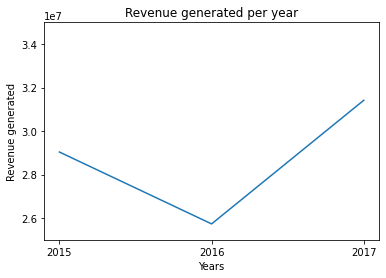

In [88]:
plt.plot(years, revenue)
 
plt.xlabel('Years')
plt.ylabel('Revenue generated')
plt.ylim([25000000, 35000000])
plt.title('Revenue generated per year')
 
plt.show()

In [44]:
avgyear1 = year1/len(prevprev_year_customers_df['customer_email'])
avgyear2 = year2/len(prev_year_customers_df['customer_email'])
avgyear3 = year3/len(curr_year_customers_df['customer_email'])

avg_revenue = []
avg_revenue.append(avgyear1)
avg_revenue.append(avgyear2)
avg_revenue.append(avgyear3)

avg_revenue

[125.54043420927475, 125.73391901136597, 125.67651529879561]

##### Observation 1
##### It seems like the total revenue generated by the retailer had dropped in the year 2016 but it increased significantly in the year 2017. The average revenue generated is similar among all the three years. That means that this drop in 2016 or increase in 2017 was not because of the number of customers.

### II) Total customers per year

In [54]:
total_customers_curr
total_customers_prev
total_customers_prevprev = len(prevprev_year_customers_df['customer_email'])

customers = []
customers.append(total_customers_curr)
customers.append(total_customers_prev)
customers.append(total_customers_prevprev)

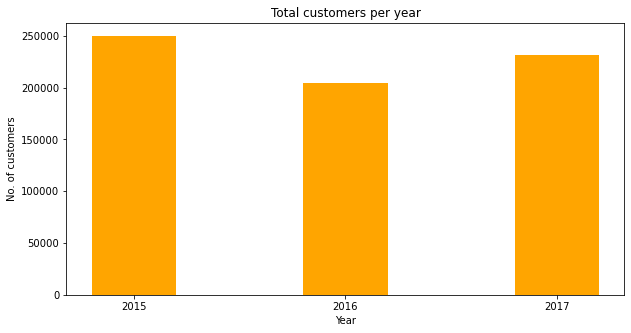

In [83]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years, customers, color ='orange',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("No. of customers")
plt.title("Total customers per year")
plt.show()

##### Observation 2:
##### The company seems to have the minimum number of customers in the year 2016. This might be because a lot of customers from 2015 might have left the company and there were very few new customers. Let's find out if this is the case from the graph below.

### III) Why exactly did 2016 have less customers?

In [65]:
new_customers_curr_df = curr_year_customers_df[~curr_year_customers_df['customer_email'].isin(prev_year_customers_df['customer_email'])]
new_customers_prev_df = prev_year_customers_df[~prev_year_customers_df['customer_email'].isin(prevprev_year_customers_df['customer_email'])]

new_customers = []
new_customers.append(len(new_customers_curr_df))
new_customers.append(len(new_customers_prev_df))
new_customers

[229028, 145062]

In [66]:
lost_customers_curr_df = prev_year_customers_df[~prev_year_customers_df['customer_email'].isin(curr_year_customers_df['customer_email'])]
lost_customers_prev_df = prevprev_year_customers_df[~prevprev_year_customers_df['customer_email'].isin(prev_year_customers_df['customer_email'])]

lost_customers = []
lost_customers.append(len(lost_customers_curr_df))
lost_customers.append(len(lost_customers_prev_df))
lost_customers

[183687, 171710]

In [67]:
#total customers
customers

[249987, 204646, 231294]

In [69]:
years1 = ['2017', '2016']

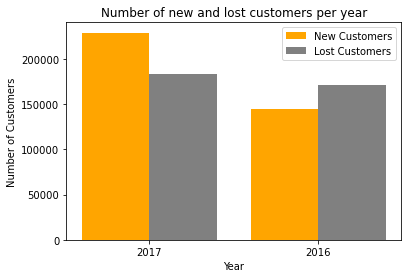

In [78]:
X_axis = np.arange(len(years1))
  
plt.bar(X_axis - 0.2, new_customers, 0.4, label = 'New Customers', color='orange')
plt.bar(X_axis + 0.2, lost_customers, 0.4, label = 'Lost Customers', color='grey')
  
plt.xticks(X_axis, years1)
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.title("Number of new and lost customers per year")
plt.legend()
plt.show()

##### Observation 3:
##### As we can see from the graph, the number of customers who left the company in 2016 were in fact more than the new customers who joined the company. As we can see, even though number of customers who left the company is similar for 2016 and 2017, the number of new customers joining the company in 2017 was way more.
##### Maybe 2016 was just a rough year for the company in regards to the total revenue and customers, but we can't say this for sure with the limited number of years for which the data is  provided.